In [44]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
from corr_func_tools import calc_wtheta, create_axes
import S4Mock_io
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table,vstack
import glob
import astropy.io.fits as fits
from desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask 
nbins=30

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
fassign = S4Mock_io.read_fassign_mock()

In [46]:
init_ledger = S4Mock_io.read_init_ledger()

In [47]:
init_ledger = init_ledger[((init_ledger['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]

In [48]:
assigned_ledger = init_ledger[np.in1d(init_ledger['TARGETID'],fassign['TARGETID'])]


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


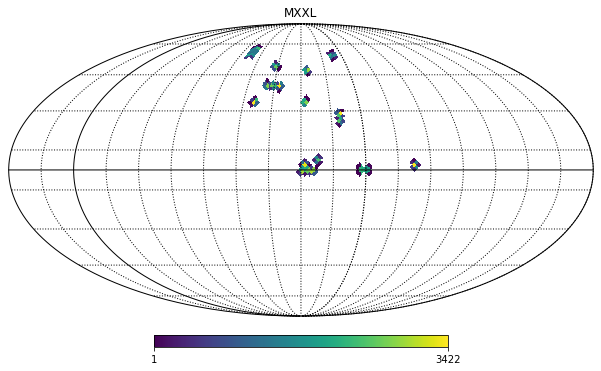

In [30]:
import geometry
import healpy as hp
target_pixel_density = geometry.targ_hpmap(assigned_ledger)
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='MXXL')
hp.graticule(dpar=5, dmer=5)

In [31]:
sv3_rand = S4Mock_io.read_sv3_randoms(number=1)

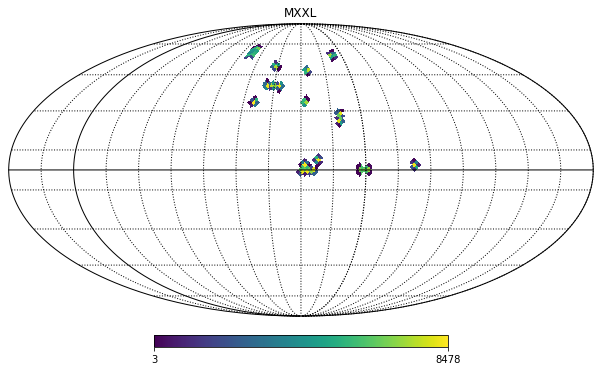

In [32]:
import geometry
import healpy as hp
target_pixel_density = geometry.targ_hpmap(sv3_rand)
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='MXXL')
hp.graticule(dpar=5, dmer=5)

In [33]:
wtheta_mock_fba = calc_wtheta(assigned_ledger['RA'],assigned_ledger['DEC'],sv3_rand['RA'],sv3_rand['DEC'])

/global/homes/l/lbigwood/.local/lib/python3.8/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\


In [36]:
wtheta_mock_init = calc_wtheta(init_ledger['RA'],init_ledger['DEC'],sv3_rand['RA'],sv3_rand['DEC'])

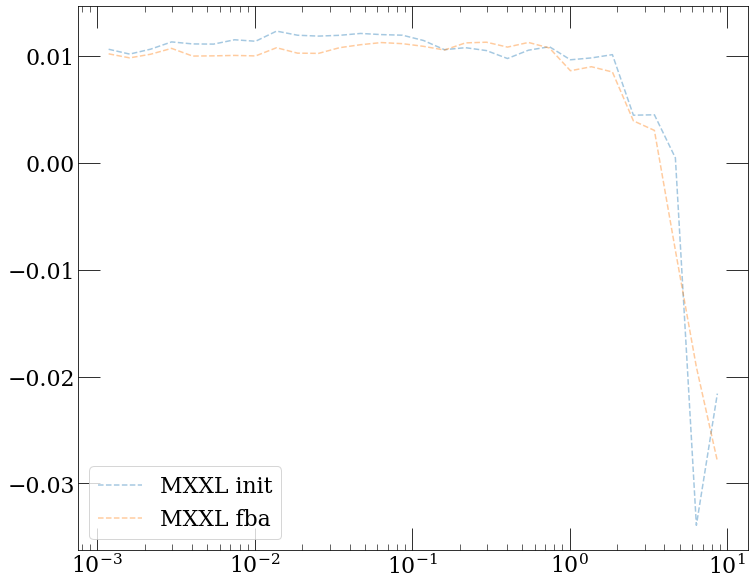

In [39]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_mock_init)
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL init')

x_axis1,y_axis1 = create_axes(wtheta_mock_fba)
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL fba')

plt.xscale('log')
plt.legend()

In [40]:
wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

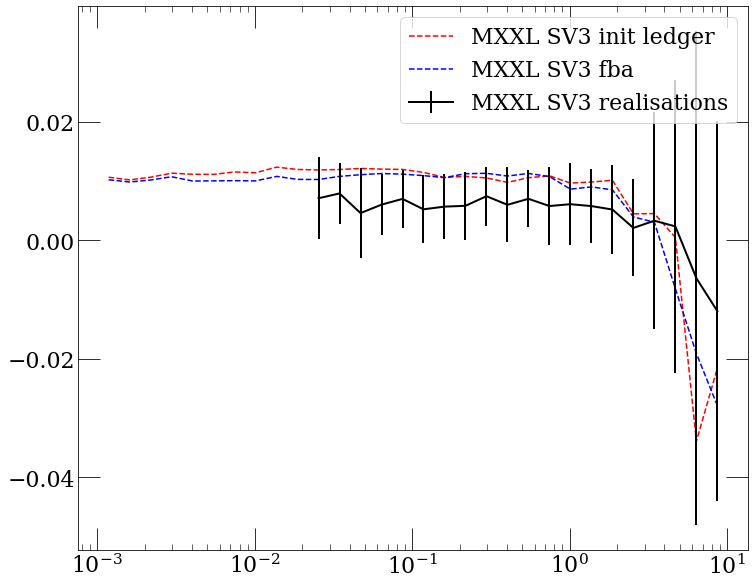

In [43]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

"""
#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

""" 
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL SV3 realisations',zorder=3,linewidth=2)

#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_mock_init)
plt.plot(x_axis1,y_axis1,color='red',linestyle='dashed',label='MXXL SV3 init ledger')

x_axis1,y_axis1 = create_axes(wtheta_mock_fba)
plt.plot(x_axis1,y_axis1,color='blue',linestyle='dashed',label='MXXL SV3 fba')


plt.xscale('log')
plt.legend()